In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import json
import xml.etree.ElementTree as ET
import shutil

In [2]:
def xml_to_json(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    json_data = {
        "folder": root.find("folder").text,
        "filename": root.find("filename").text,
        "path": root.find("path").text,
        "source": {
            "database": root.find("source/database").text
        },
        "size": {
            "width": int(root.find("size/width").text),
            "height": int(root.find("size/height").text),
            "depth": int(root.find("size/depth").text)
        },
        "segmented": int(root.find("segmented").text),
        "objects": []
    }
    
    for obj in root.findall("object"):
        json_data["objects"].append({
            "name": obj.find("name").text,
            "pose": obj.find("pose").text,
            "truncated": int(obj.find("truncated").text),
            "difficult": int(obj.find("difficult").text),
            "bndbox": {
                "xmin": int(obj.find("bndbox/xmin").text),
                "ymin": int(obj.find("bndbox/ymin").text),
                "xmax": int(obj.find("bndbox/xmax").text),
                "ymax": int(obj.find("bndbox/ymax").text)
            }
        })
    
    return json_data

def convert_annotations(annotations_folder, output_folder, output_images_folder):
    # Create the output folders if they don't exist
    os.makedirs(output_folder, exist_ok=True)
    os.makedirs(output_images_folder, exist_ok=True)
    
    for xml_file in os.listdir(annotations_folder):
        if xml_file.endswith(".xml"):
            xml_path = os.path.join(annotations_folder, xml_file)
            tree = ET.parse(xml_path)
            root = tree.getroot()
            
            # Check if the XML file has only one bounding box
            if len(root.findall("object")) == 1:
                json_data = xml_to_json(xml_path)
                
                json_file = xml_file.replace(".xml", ".json")
                json_path = os.path.join(output_folder, json_file)
                
                with open(json_path, "w") as f:
                    json.dump(json_data, f, indent=4)
                
                print(f"Converted {xml_file} to {json_file}")
                
                # Get the image path from the JSON data and add the prefix
                image_path = os.path.join("wider_face/data", json_data["path"])
                image_file = os.path.basename(image_path)
                output_image_path = os.path.join(output_images_folder, image_file)
                
                # Copy the image file to the output folder
                shutil.copy2(image_path, output_image_path)
                print(f"Copied {image_file} to {output_images_folder}")

# Usage example
annotations_folder = "wider_face/data/WIDER_train_annotations/"
output_folder = "data_image/annotation/"
output_images_folder = "data_image/image/"
convert_annotations(annotations_folder, output_folder, output_images_folder)

Converted 28_Sports_Fan_Sports_Fan_28_216.xml to 28_Sports_Fan_Sports_Fan_28_216.json
Copied 28_Sports_Fan_Sports_Fan_28_216.jpg to data_image/image/
Converted 7_Cheering_Cheering_7_611.xml to 7_Cheering_Cheering_7_611.json
Copied 7_Cheering_Cheering_7_611.jpg to data_image/image/
Converted 52_Photographers_photographertakingphoto_52_628.xml to 52_Photographers_photographertakingphoto_52_628.json
Copied 52_Photographers_photographertakingphoto_52_628.jpg to data_image/image/
Converted 16_Award_Ceremony_Awards_Ceremony_16_291.xml to 16_Award_Ceremony_Awards_Ceremony_16_291.json
Copied 16_Award_Ceremony_Awards_Ceremony_16_291.jpg to data_image/image/
Converted 51_Dresses_wearingdress_51_620.xml to 51_Dresses_wearingdress_51_620.json
Copied 51_Dresses_wearingdress_51_620.jpg to data_image/image/
Converted 28_Sports_Fan_Sports_Fan_28_202.xml to 28_Sports_Fan_Sports_Fan_28_202.json
Copied 28_Sports_Fan_Sports_Fan_28_202.jpg to data_image/image/
Converted 44_Aerobics_Aerobics_44_259.xml to 4

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import os
import random
import shutil

# Set the paths for the source folder and destination folders
source_folder = "data_image/image"
train_folder = "data_image/train/images"
test_folder = "data_image/test/images"
val_folder = "data_image/val/images"

# Get a list of all image files in the source folder
image_files = [f for f in os.listdir(source_folder) if f.endswith((".jpg", ".jpeg", ".png"))]

# Shuffle the image files randomly
random.shuffle(image_files)

# Calculate the number of images for each split
total_images = len(image_files)
train_size = int(0.7 * total_images)
test_size = int(0.2 * total_images)
val_size = total_images - train_size - test_size

# Split the image files into train, test, and validation sets
train_files = image_files[:train_size]
test_files = image_files[train_size:train_size+test_size]
val_files = image_files[train_size+test_size:]

# Copy the images to the respective folders
for file in train_files:
    shutil.copy(os.path.join(source_folder, file), train_folder)
for file in test_files:
    shutil.copy(os.path.join(source_folder, file), test_folder)  
for file in val_files:
    shutil.copy(os.path.join(source_folder, file), val_folder)


In [6]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data_image', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data_image','annotation', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data_image',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [7]:
img = cv2.imread(os.path.join('data_image/train/images/0_Parade_marchingband_1_431.jpg'))

In [8]:
img.shape

(683, 1024, 3)

In [9]:
with open(os.path.join('data_image/train/labels/0_Parade_marchingband_1_431.json'), 'r') as f:
    label = json.load(f)

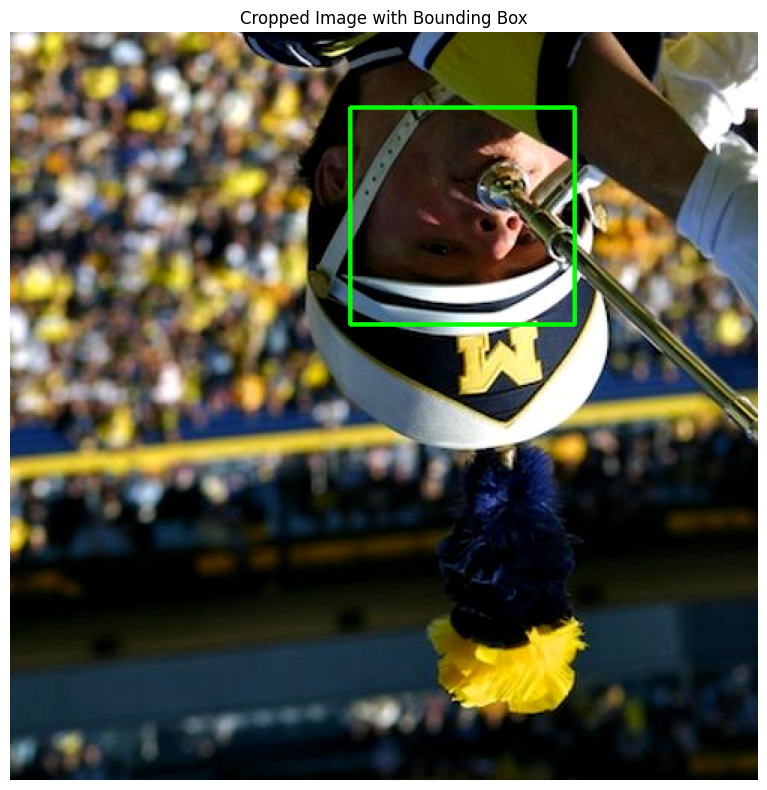

In [10]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt

# Extract the bounding box coordinates
x_min = label['objects'][0]['bndbox']['xmin']
y_min = label['objects'][0]['bndbox']['ymin']
x_max = label['objects'][0]['bndbox']['xmax']
y_max = label['objects'][0]['bndbox']['ymax']

# Get the image dimensions
height, width = img.shape[:2]

# Normalize the bounding box coordinates to the range [0.0, 1.0]
bbox = [x_min / width, y_min / height, x_max / width, y_max / height]

transform = A.Compose([
    A.RandomCrop(width=500, height=500),
    A.HorizontalFlip(p=0.5), 
    A.RandomBrightnessContrast(p=0.2),
    A.RandomGamma(p=0.2), 
    A.RGBShift(p=0.2), 
    A.VerticalFlip(p=0.5)
], bbox_params=A.BboxParams(format='albumentations', label_fields=['class_labels']))

transformed = transform(image=img, bboxes=[bbox], class_labels=['face'])

cropped_img = transformed['image']
cropped_labels = transformed['bboxes']

# Convert the cropped image from BGR to RGB color space
cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

# Extract the cropped bounding box coordinates
if cropped_labels:
    x_min, y_min, x_max, y_max = cropped_labels[0]

    # Convert the normalized coordinates back to pixel values
    x_min = int(x_min * 500)
    y_min = int(y_min * 500)
    x_max = int(x_max * 500)
    y_max = int(y_max * 500)

    # Draw the cropped bounding box on the cropped image
    cv2.rectangle(cropped_img_rgb, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Display the cropped image with the bounding box using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cropped_img_rgb)
plt.axis('off')
plt.title('Cropped Image with Bounding Box')
plt.tight_layout()
plt.show()


In [12]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data_image', partition, 'images')):
        img = cv2.imread(os.path.join('data_image', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data_image', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            # Extract the bounding box coordinates
            x_min = label['objects'][0]['bndbox']['xmin']
            y_min = label['objects'][0]['bndbox']['ymin']
            x_max = label['objects'][0]['bndbox']['xmax']
            y_max = label['objects'][0]['bndbox']['ymax']

            # Get the image dimensions
            height, width = img.shape[:2]

            # Normalize the bounding box coordinates to the range [0.0, 1.0]
            bbox = [x_min / width, y_min / height, x_max / width, y_max / height]

        try: 
            for x in range(5):
                augmented = transform(image=img, bboxes=[bbox], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data_wider', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data_wider', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

Requested crop size (500, 500) is larger than the image size (451, 1024)
Requested crop size (500, 500) is larger than the image size (216, 1024)
Requested crop size (500, 500) is larger than the image size (469, 1024)
Requested crop size (500, 500) is larger than the image size (468, 1024)
Requested crop size (500, 500) is larger than the image size (434, 1024)
Requested crop size (500, 500) is larger than the image size (497, 1024)
Requested crop size (500, 500) is larger than the image size (386, 1024)
Requested crop size (500, 500) is larger than the image size (366, 1024)
Requested crop size (500, 500) is larger than the image size (306, 1024)
Requested crop size (500, 500) is larger than the image size (478, 1024)
image must be numpy array type
x_max is less than or equal to x_min for bbox [0.0, 0.0, 0.0, 0.0, 'face'].
Requested crop size (500, 500) is larger than the image size (294, 1024)
Requested crop size (500, 500) is larger than the image size (307, 1024)
Requested crop si

In [52]:
def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image


In [53]:
train_images = tf.data.Dataset.list_files('aug_data_wider/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x / 255)


In [54]:
train_images

<_MapDataset element_spec=TensorSpec(shape=(120, 120, 3), dtype=tf.float32, name=None)>

In [55]:
test_images = tf.data.Dataset.list_files('aug_data_wider/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x,(120,120)))
test_images = test_images.map(lambda x: x/255)

In [56]:
test_images

<_MapDataset element_spec=TensorSpec(shape=(120, 120, 3), dtype=tf.float32, name=None)>

In [57]:
val_images = tf.data.Dataset.list_files('aug_data_wider/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images = val_images.map(lambda x: x/255)

In [58]:
val_images

<_MapDataset element_spec=TensorSpec(shape=(120, 120, 3), dtype=tf.float32, name=None)>

In [59]:
import tensorflow as tf
import json

def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        label = json.load(f)
    return [label['class']], label['bbox']

def load_labels_wrapper(label_path):
    output = tf.py_function(load_labels, [label_path], [tf.uint8, tf.float16])
    # Directly set the shapes of the tensors without unpacking
    output[0].set_shape([1])  # Setting the shape for class label tensor
    output[1].set_shape([4])  # Assuming bbox contains 4 elements [x_min, y_min, x_max, y_max]
    return output


In [60]:
train_labels = tf.data.Dataset.list_files('aug_data_wider/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(load_labels_wrapper)

train_labels


<_MapDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.uint8, name=None), TensorSpec(shape=(4,), dtype=tf.float16, name=None))>

In [61]:
test_labels = tf.data.Dataset.list_files('aug_data_wider/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(load_labels_wrapper)

test_labels


<_MapDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.uint8, name=None), TensorSpec(shape=(4,), dtype=tf.float16, name=None))>

In [62]:
val_labels = tf.data.Dataset.list_files('aug_data_wider/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(load_labels_wrapper)

val_labels


<_MapDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.uint8, name=None), TensorSpec(shape=(4,), dtype=tf.float16, name=None))>

In [63]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(15935, 15935, 4535, 4535, 2280, 2280)

In [64]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [65]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 4), dtype=tf.float16, name=None)))>

In [66]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [67]:
test

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 4), dtype=tf.float16, name=None)))>

In [68]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [69]:
val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), (TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 4), dtype=tf.float16, name=None)))>

In [70]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.674, 0.132, 0.858, 0.368],
        [0.226, 0.   , 1.   , 1.   ],
        [0.   , 0.   , 0.   , 0.   ],
        [0.326, 0.666, 0.812, 1.   ],
        [0.82 , 0.314, 1.   , 0.642],
        [0.46 , 0.01 , 0.676, 0.29 ],
        [0.074, 0.144, 0.238, 0.42 ],
        [0.58 , 0.212, 0.844, 0.692]], dtype=float16))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


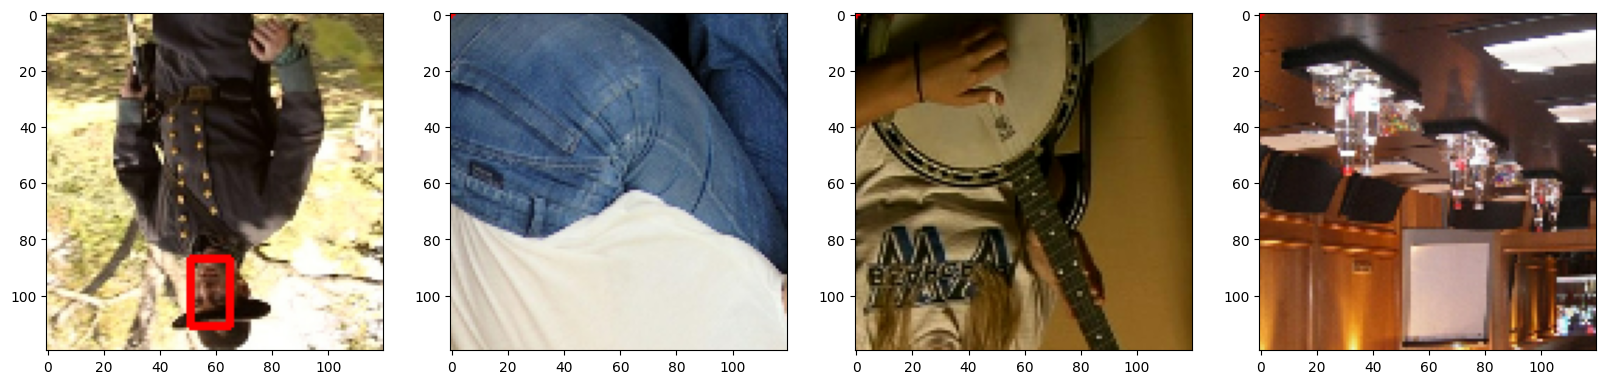

In [71]:
data_samples = train.as_numpy_iterator()
res = data_samples.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    # Create a copy of the sample_image
    sample_image_copy = np.copy(sample_image)
    
    cv2.rectangle(sample_image_copy, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image_copy)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [72]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [73]:
vgg = VGG16(include_top=False)

### 8.3 Build instance of Network

In [74]:
def build_model(input_shape=(120, 120, 3)):
    input_layer = Input(shape=input_shape)
    base_model = VGG16(include_top=False, input_tensor=input_layer)
    
    # Feature extraction
    pooled_features = GlobalMaxPooling2D()(base_model.output)
    
    # Classification head
    classifier_output = Dense(2048, activation='relu')(pooled_features)
    classifier_output = Dense(1, activation='sigmoid', name='class_output')(classifier_output)
    
    # Regression head
    regressor_output = Dense(2048, activation='relu')(pooled_features)
    regressor_output = Dense(4, activation='sigmoid', name='bbox_output')(regressor_output)
    
    # Full model
    model = Model(inputs=input_layer, outputs=[classifier_output, regressor_output])
    return model


In [75]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [76]:
# Build and compile the model
facetracker = build_model()
facetracker.summary()
batches_per_epoch = len(train)
lr_decay = (1. / 0.75 - 1) / batches_per_epoch
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

facetracker.compile(optimizer=optimizer,
                    loss={'class_output': tf.keras.losses.BinaryCrossentropy(),
                          'bbox_output': localization_loss},
                    metrics={'class_output': ['accuracy'], 'bbox_output': []})

# Callbacks and training
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
hist = facetracker.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 120, 120,  │      1,792 │ input_layer_3[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 120, 120,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 60, 60,    │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 60, 60,    │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 60, 60,    │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 30, 30,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 30, 30,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 30, 30,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 30, 30,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 15, 15,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 15, 15,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 15, 15,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 15, 15,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 7, 7, 512) │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 7, 7, 512) │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 7, 7, 512) │  2,359,808 │ block5_conv1[0][

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2024-04-22 21:41:31.552559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1992/1992 ━━━━━━━━━━━━━━━━━━━━ 258s 126ms/step - class_output_accuracy: 0.7630 - loss: 1.9769 - val_class_output_accuracy: 0.8504 - val_loss: 1.2058
Epoch 2/10
1992/1992 ━━━━━━━━━━━━━━━━━━━━ 253s 125ms/step - class_output_accuracy: 0.8374 - loss: 1.2355 - val_class_output_accuracy: 0.8408 - val_loss: 1.1564
Epoch 3/10
1992/1992 ━━━━━━━━━━━━━━━━━━━━ 255s 126ms/step - class_output_accuracy: 0.8686 - loss: 1.0072 - val_class_output_accuracy: 0.8246 - val_loss: 1.4168
Epoch 4/10
1992/1992 ━━━━━━━━━━━━━━━━━━━━ 264s 130ms/step - class_output_accuracy: 0.8932 - loss: 0.8545 - val_class_output_accuracy: 0.8561 - val_loss: 1.1396
Epoch 5/10
1992/1992 ━━━━━━━━━━━━━━━━━━━━ 256s 127ms/step - class_output_accuracy: 0.9126 - loss: 0.7033 - val_class_output_accuracy: 0.8518 - val_loss: 1.1805
Epoch 6/10
1992/1992 ━━━━━━━━━━━━━━━━━━━━ 259s 128ms/step - class_output_accuracy: 0.9381 - loss: 0.5289 - val_class_output_accuracy: 0.8504 - val_loss: 1.1952
Epoch 7/10
1992/1992 ━━━━━━━━━━━━━━━━━━━━ 257s 127m

### 10.3 Plot Performance

In [77]:
hist.history

{'class_output_accuracy': [0.7870097160339355,
  0.8399121165275574,
  0.8704738020896912,
  0.8959522843360901,
  0.9149670600891113,
  0.9349231123924255,
  0.9470348358154297,
  0.9551302194595337,
  0.9627235531806946,
  0.9700031280517578],
 'loss': [1.650166630744934,
  1.1975502967834473,
  0.9959074854850769,
  0.8271520137786865,
  0.6895473003387451,
  0.5501789450645447,
  0.47103145718574524,
  0.42556145787239075,
  0.37951719760894775,
  0.3263598382472992],
 'val_class_output_accuracy': [0.8504385948181152,
  0.8407894968986511,
  0.8245614171028137,
  0.8561403751373291,
  0.851754367351532,
  0.8504385948181152,
  0.8407894968986511,
  0.8578947186470032,
  0.8649122714996338,
  0.8543859720230103],
 'val_loss': [1.2057605981826782,
  1.1563515663146973,
  1.41679048538208,
  1.139634132385254,
  1.1804794073104858,
  1.1951833963394165,
  1.3686332702636719,
  1.3004218339920044,
  1.207372784614563,
  1.4281048774719238]}

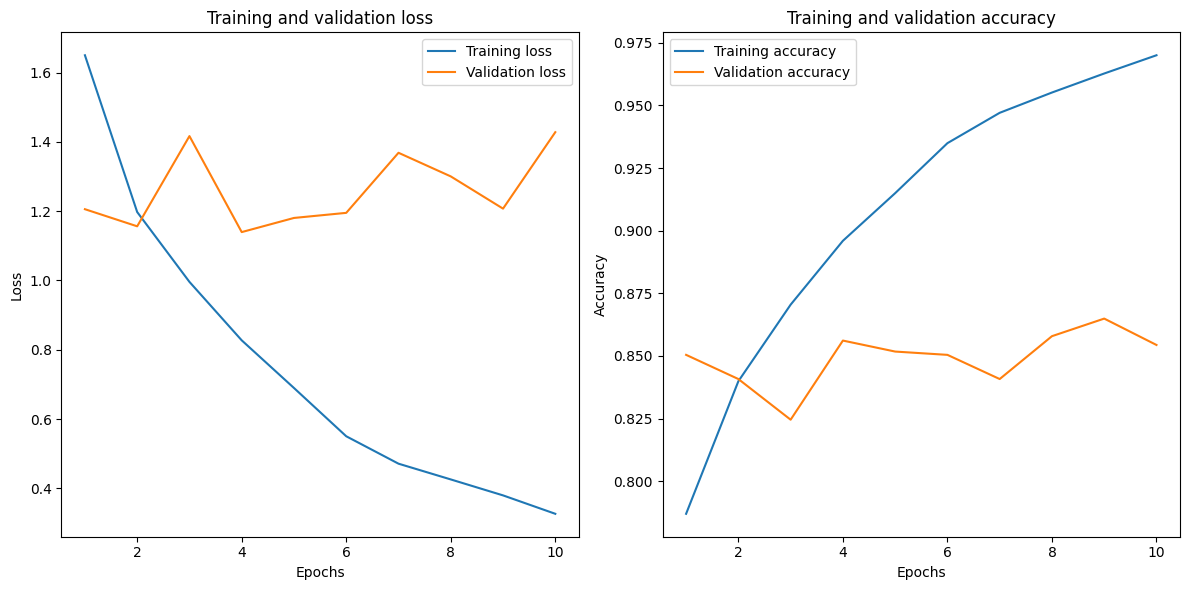

In [78]:
import matplotlib.pyplot as plt

# Extracting data from the training history
history_dict = hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['class_output_accuracy']  # This might differ based on your specific outputs
val_acc_values = history_dict['val_class_output_accuracy']  # This might differ too

epochs = range(1, len(loss_values) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, label='Training loss')
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, label='Training accuracy')
plt.plot(epochs, val_acc_values, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [79]:
test_data = test.as_numpy_iterator()

In [80]:
test_sample = test_data.next()

In [81]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


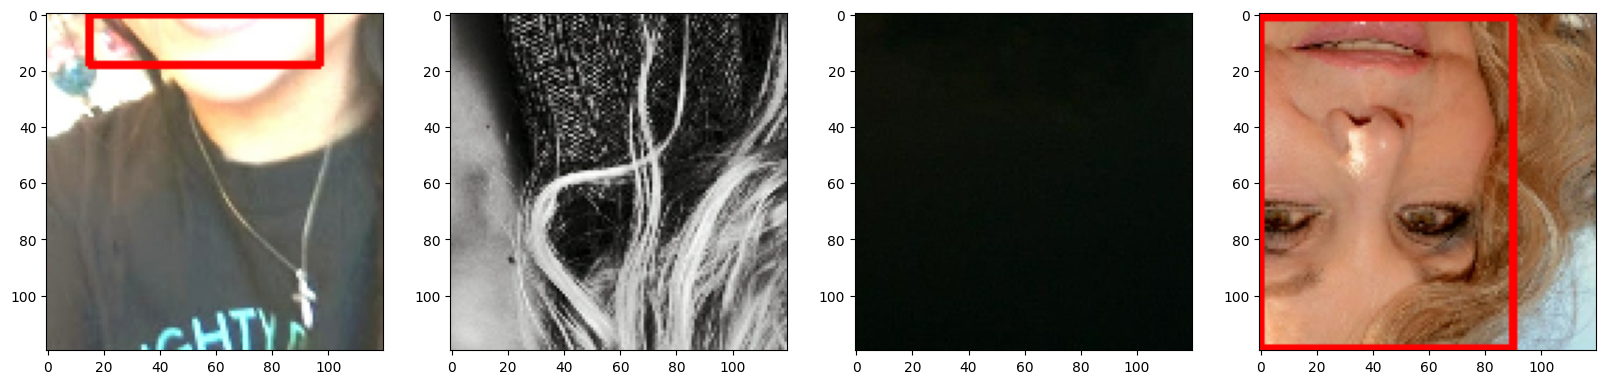

In [82]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx].copy()  # Create a copy of the image array
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)


### 11.2 Save the Model

In [83]:
from tensorflow.keras.models import load_model

In [84]:
facetracker.save('facetracker_wider.h5')

In [85]:
facetracker = load_model('facetracker_wider.h5')

### 11.3 Real Time Detection

In [86]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [frame.shape[1],frame.shape[0]]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [frame.shape[1],frame.shape[0]]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1],frame.shape[0]]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1],frame.shape[0]]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [frame.shape[1],frame.shape[0]]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


2024-04-22 22:24:29.348 Python[5575:1182468] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


2024-04-22 22:24:31.082 Python[5575:1182468] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9m

KeyboardInterrupt: 